## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0   9.297703  1276.645431  0.150125   4.796767  191.750379
1  49.962166   313.050596  0.420943   9.585322  140.980577
2  43.926343   530.676435  0.041915   8.420929   49.119826
3  44.516965   374.216074  0.397736  10.219664  155.474705
4  97.043248  1433.608854  0.436639   5.369894  633.369801


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0192706	total: 58.1ms	remaining: 58.1s
1:	learn: 1.0070457	total: 58.8ms	remaining: 29.4s
2:	learn: 0.9979146	total: 59.4ms	remaining: 19.7s
3:	learn: 0.9869376	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9739709	total: 60.2ms	remaining: 12s
5:	learn: 0.9600434	total: 60.6ms	remaining: 10s
6:	learn: 0.9471124	total: 61ms	remaining: 8.65s
7:	learn: 0.9355132	total: 61.3ms	remaining: 7.6s
8:	learn: 0.9227947	total: 62.1ms	remaining: 6.84s
9:	learn: 0.9099837	total: 62.6ms	remaining: 6.19s
10:	learn: 0.8991828	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8852429	total: 63.6ms	remaining: 5.24s
12:	learn: 0.8731419	total: 64.6ms	remaining: 4.91s
13:	learn: 0.8615124	total: 65.2ms	remaining: 4.59s
14:	learn: 0.8510306	total: 65.8ms	remaining: 4.32s
15:	learn: 0.8427577	total: 66.4ms	remaining: 4.08s
16:	learn: 0.8314467	total: 67ms	remaining: 3.87s
17:	learn: 0.8233285	total: 67.5ms	remaining: 3.68s
18:	learn: 0.8162157	total: 68ms	remaining: 3.51s
19:

48:	learn: 0.5680149	total: 89ms	remaining: 1.73s
49:	learn: 0.5619018	total: 90.1ms	remaining: 1.71s
50:	learn: 0.5560193	total: 91ms	remaining: 1.69s
51:	learn: 0.5493027	total: 91.8ms	remaining: 1.67s
52:	learn: 0.5426680	total: 94.1ms	remaining: 1.68s
53:	learn: 0.5353276	total: 95.1ms	remaining: 1.67s
54:	learn: 0.5305014	total: 95.8ms	remaining: 1.65s
55:	learn: 0.5249563	total: 96.6ms	remaining: 1.63s
56:	learn: 0.5187988	total: 97.4ms	remaining: 1.61s
57:	learn: 0.5116824	total: 98.1ms	remaining: 1.59s
58:	learn: 0.5044531	total: 98.6ms	remaining: 1.57s
59:	learn: 0.4977575	total: 99.3ms	remaining: 1.56s
60:	learn: 0.4913311	total: 100ms	remaining: 1.54s
61:	learn: 0.4848336	total: 101ms	remaining: 1.53s
62:	learn: 0.4797446	total: 102ms	remaining: 1.52s
63:	learn: 0.4725979	total: 103ms	remaining: 1.51s
64:	learn: 0.4678279	total: 104ms	remaining: 1.5s
65:	learn: 0.4624523	total: 105ms	remaining: 1.49s
66:	learn: 0.4570914	total: 106ms	remaining: 1.47s
67:	learn: 0.4526016	tot

149:	learn: 0.2013362	total: 151ms	remaining: 856ms
150:	learn: 0.1992627	total: 152ms	remaining: 852ms
151:	learn: 0.1976864	total: 152ms	remaining: 848ms
152:	learn: 0.1959713	total: 153ms	remaining: 844ms
153:	learn: 0.1942415	total: 153ms	remaining: 841ms
154:	learn: 0.1924415	total: 154ms	remaining: 837ms
155:	learn: 0.1905148	total: 154ms	remaining: 833ms
156:	learn: 0.1890139	total: 155ms	remaining: 830ms
157:	learn: 0.1870123	total: 155ms	remaining: 826ms
158:	learn: 0.1853766	total: 156ms	remaining: 823ms
159:	learn: 0.1836085	total: 156ms	remaining: 819ms
160:	learn: 0.1824274	total: 156ms	remaining: 816ms
161:	learn: 0.1809223	total: 157ms	remaining: 812ms
162:	learn: 0.1794146	total: 157ms	remaining: 809ms
163:	learn: 0.1780995	total: 158ms	remaining: 806ms
164:	learn: 0.1769119	total: 159ms	remaining: 802ms
165:	learn: 0.1751328	total: 159ms	remaining: 798ms
166:	learn: 0.1737944	total: 159ms	remaining: 795ms
167:	learn: 0.1719794	total: 160ms	remaining: 791ms
168:	learn: 

311:	learn: 0.0610915	total: 236ms	remaining: 521ms
312:	learn: 0.0606945	total: 237ms	remaining: 520ms
313:	learn: 0.0603471	total: 237ms	remaining: 519ms
314:	learn: 0.0601429	total: 238ms	remaining: 517ms
315:	learn: 0.0597006	total: 238ms	remaining: 516ms
316:	learn: 0.0593798	total: 239ms	remaining: 515ms
317:	learn: 0.0591240	total: 239ms	remaining: 513ms
318:	learn: 0.0587751	total: 240ms	remaining: 512ms
319:	learn: 0.0583738	total: 240ms	remaining: 510ms
320:	learn: 0.0580053	total: 241ms	remaining: 509ms
321:	learn: 0.0576705	total: 241ms	remaining: 508ms
322:	learn: 0.0573462	total: 242ms	remaining: 506ms
323:	learn: 0.0571570	total: 242ms	remaining: 505ms
324:	learn: 0.0567117	total: 242ms	remaining: 504ms
325:	learn: 0.0563958	total: 243ms	remaining: 503ms
326:	learn: 0.0560843	total: 244ms	remaining: 502ms
327:	learn: 0.0557638	total: 245ms	remaining: 501ms
328:	learn: 0.0554478	total: 245ms	remaining: 500ms
329:	learn: 0.0551490	total: 246ms	remaining: 499ms
330:	learn: 

499:	learn: 0.0251035	total: 332ms	remaining: 332ms
500:	learn: 0.0250512	total: 332ms	remaining: 331ms
501:	learn: 0.0249997	total: 333ms	remaining: 330ms
502:	learn: 0.0249377	total: 333ms	remaining: 329ms
503:	learn: 0.0248873	total: 334ms	remaining: 328ms
504:	learn: 0.0247627	total: 334ms	remaining: 328ms
505:	learn: 0.0247131	total: 335ms	remaining: 327ms
506:	learn: 0.0246700	total: 335ms	remaining: 326ms
507:	learn: 0.0245486	total: 336ms	remaining: 325ms
508:	learn: 0.0245065	total: 336ms	remaining: 324ms
509:	learn: 0.0244649	total: 337ms	remaining: 324ms
510:	learn: 0.0243858	total: 337ms	remaining: 323ms
511:	learn: 0.0243450	total: 338ms	remaining: 322ms
512:	learn: 0.0242396	total: 339ms	remaining: 321ms
513:	learn: 0.0241225	total: 339ms	remaining: 320ms
514:	learn: 0.0239922	total: 339ms	remaining: 320ms
515:	learn: 0.0239088	total: 340ms	remaining: 319ms
516:	learn: 0.0238194	total: 341ms	remaining: 319ms
517:	learn: 0.0237287	total: 342ms	remaining: 318ms
518:	learn: 

649:	learn: 0.0135332	total: 415ms	remaining: 223ms
650:	learn: 0.0134832	total: 416ms	remaining: 223ms
651:	learn: 0.0134342	total: 417ms	remaining: 222ms
652:	learn: 0.0133931	total: 417ms	remaining: 222ms
653:	learn: 0.0133449	total: 418ms	remaining: 221ms
654:	learn: 0.0133047	total: 418ms	remaining: 220ms
655:	learn: 0.0132571	total: 419ms	remaining: 220ms
656:	learn: 0.0132098	total: 420ms	remaining: 219ms
657:	learn: 0.0131590	total: 420ms	remaining: 218ms
658:	learn: 0.0130937	total: 421ms	remaining: 218ms
659:	learn: 0.0130261	total: 421ms	remaining: 217ms
660:	learn: 0.0129801	total: 422ms	remaining: 216ms
661:	learn: 0.0129223	total: 422ms	remaining: 215ms
662:	learn: 0.0128658	total: 422ms	remaining: 215ms
663:	learn: 0.0128270	total: 423ms	remaining: 214ms
664:	learn: 0.0127631	total: 423ms	remaining: 213ms
665:	learn: 0.0127121	total: 424ms	remaining: 213ms
666:	learn: 0.0126686	total: 424ms	remaining: 212ms
667:	learn: 0.0126190	total: 425ms	remaining: 211ms
668:	learn: 

823:	learn: 0.0072696	total: 509ms	remaining: 109ms
824:	learn: 0.0072411	total: 510ms	remaining: 108ms
825:	learn: 0.0072133	total: 510ms	remaining: 107ms
826:	learn: 0.0071995	total: 510ms	remaining: 107ms
827:	learn: 0.0071704	total: 511ms	remaining: 106ms
828:	learn: 0.0071470	total: 511ms	remaining: 105ms
829:	learn: 0.0071187	total: 512ms	remaining: 105ms
830:	learn: 0.0070958	total: 512ms	remaining: 104ms
831:	learn: 0.0070734	total: 512ms	remaining: 103ms
832:	learn: 0.0070491	total: 513ms	remaining: 103ms
833:	learn: 0.0070185	total: 513ms	remaining: 102ms
834:	learn: 0.0069948	total: 514ms	remaining: 102ms
835:	learn: 0.0069678	total: 514ms	remaining: 101ms
836:	learn: 0.0069539	total: 515ms	remaining: 100ms
837:	learn: 0.0069354	total: 515ms	remaining: 99.6ms
838:	learn: 0.0069060	total: 516ms	remaining: 99ms
839:	learn: 0.0068924	total: 516ms	remaining: 98.3ms
840:	learn: 0.0068653	total: 517ms	remaining: 97.7ms
841:	learn: 0.0068394	total: 517ms	remaining: 97ms
842:	learn:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

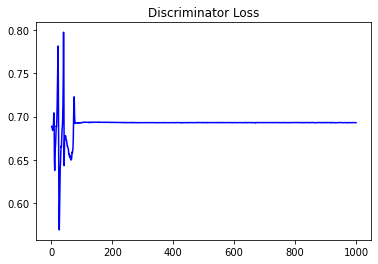

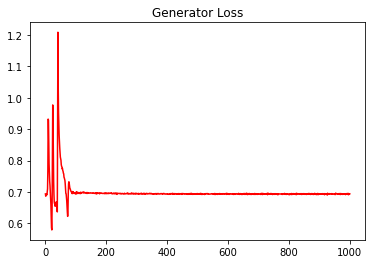

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.004107907419219175


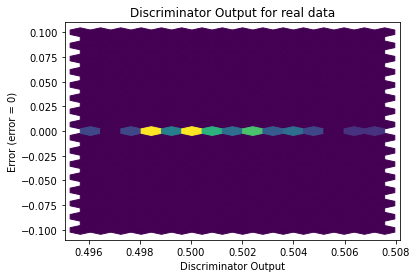

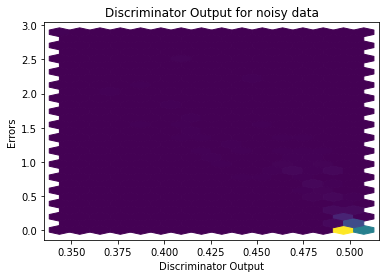

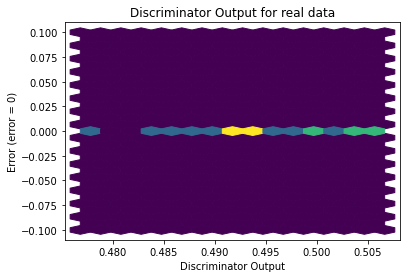

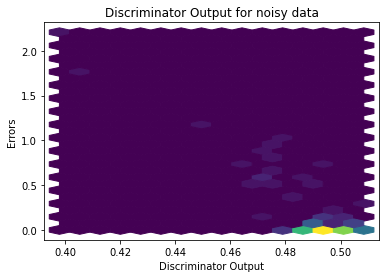

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


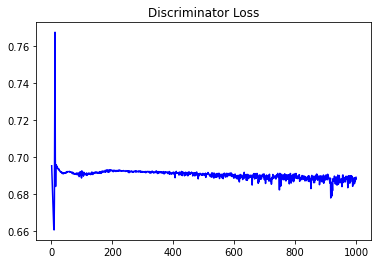

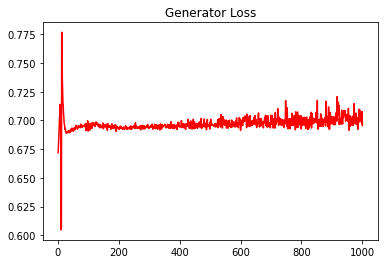

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.005047894539733999


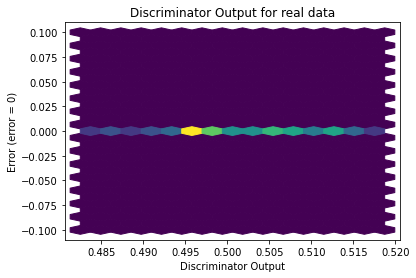

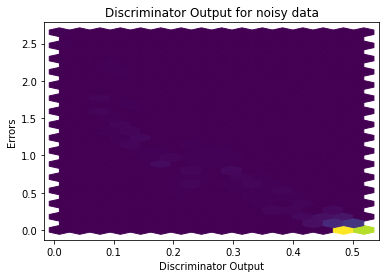

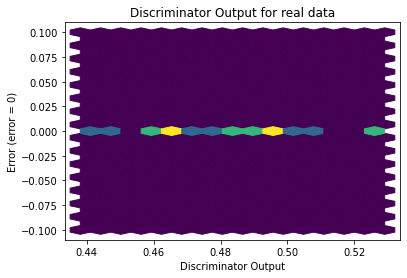

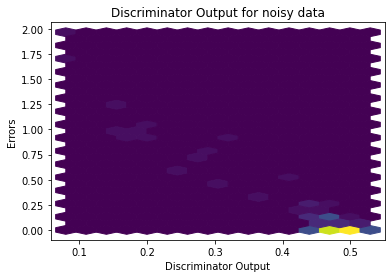

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0690]], requires_grad=True)
